General flow of a gradient model.
1. Calculate the slope of the loss (which tells the direction in which we move) i.e the actual val VS predicted val.
2. Update the w and b values (variables) to the closer values to the actual perfect line.
3. Make predictions again to check the newly formed line.
4. Repeat until - i) The difference between the newer and older values is very very small (0.001)
                 ii) Limit the epochs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score

In [2]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, noise=30, n_targets=1)


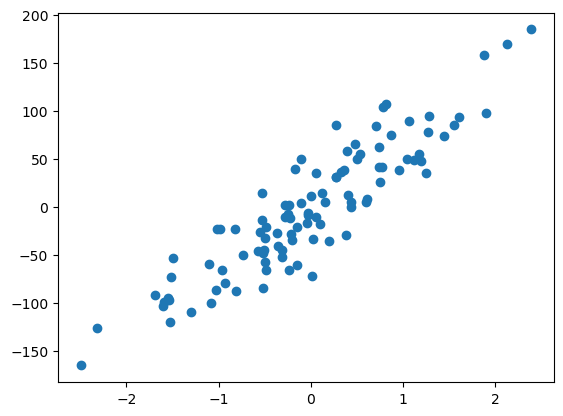

In [3]:
plt.scatter(X, y)

In [4]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X, y)

print("Coefficient: ", lr_model.coef_)
print("Intercept: ", lr_model.intercept_)

Coefficient:  [63.96626719]
Intercept:  -1.497378526080582


In [5]:
m = 33.3975901

In [ ]:
#Making a class to create gradient descent

class GDRegressor():
    def __init__(self, learning_rate, epochs):
        self.m = m
        self.b = -120 #Random value to start with.
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, X, y):
        #Calculate the b using GD.
        for i in range(self.epochs):
            #Calculate the slope (gradient)
            loss_slope_wrt_b = (-2/len(X)) * np.sum(y - (self.m * X.ravel() + self.b))
            loss_slope_wrt_m = (-2/len(X)) * np.sum(X.ravel() * (y - (self.m * X.ravel() + self.b)))
            self.b = self.b - (self.lr * loss_slope_wrt_b)
            self.m = self.m - (self.lr * loss_slope_wrt_m)
            
            print(loss_slope_wrt_b, self.b)
            print(loss_slope_wrt_m, self.m)
        
        print(self.m, self.b)
        

In [7]:
gd = GDRegressor(0.002, 2000)

In [8]:
gd.fit(X, y)

-236.1566786542159 -119.52768664269156
-51.926389711306854 33.50144287942262
-235.2149348173945 -119.05725677305678
-51.75191241196232 33.604946704246544
-234.276948269194 -118.5887028765184
-51.57801314203406 33.70810273053061
-233.34270401255122 -118.1220174684933
-51.40469002194221 33.8109121105745
-232.41218711028688 -117.65719309427273
-51.231941178064474 33.913375992930625
-231.48538268486658 -117.194222328903
-51.05976474271784 34.01549552241606
-230.5622759181621 -116.73309777706667
-50.8881588541405 34.11727184012434
-229.64285205121453 -116.27381207296425
-50.717121656473765 34.21870608343728
-228.72709638399778 -115.81635788019625
-50.54665129974393 34.31979938603677
-227.81499427518315 -115.36072789164588
-50.37674593984434 34.42055287791646
-226.90653114190474 -114.90691482936207
-50.20740373851757 34.520967685393494
-226.0016924595262 -114.45491144444301
-50.03862286333731 34.62104493112017
-225.10046376140792 -114.0047105169202
-49.87040148769073 34.72078573409555
-224.2

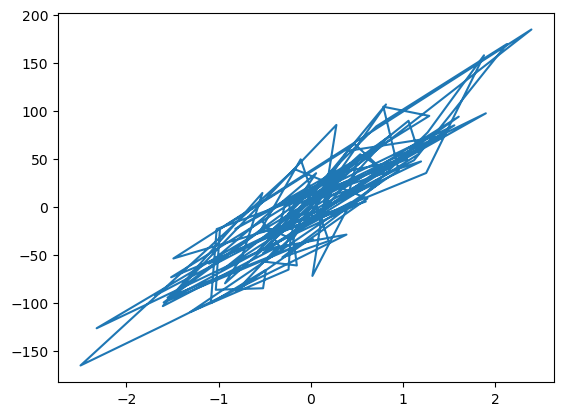

In [9]:
plt.plot(X, y)